In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('mushrooms.csv')
data.head(7)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
data.shape

(8124, 23)

In [7]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
data['cap-color'].unique()

array([4, 9, 8, 3, 2, 5, 0, 7, 1, 6])

In [9]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


Text(0.5, 1.0, 'Class w.r.t stalkcolor above ring')

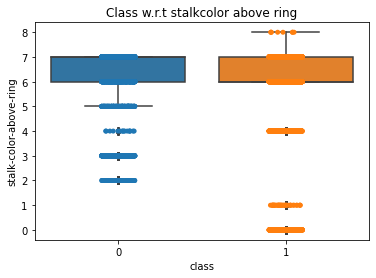

In [10]:
ax = sns.boxplot(x = 'class', y = 'stalk-color-above-ring', data = data)
bx = sns.stripplot(x = 'class', y = 'stalk-color-above-ring', data = data, jitter = True, edgecolor =  'gray')
plt.title("Class w.r.t stalkcolor above ring",fontsize=12)

In [11]:
X = data.iloc[:, 1:23]
y = data.iloc[:, 0]
X.head(15)
y.head(15)

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    0
Name: class, dtype: int64

In [12]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


In [14]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [15]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

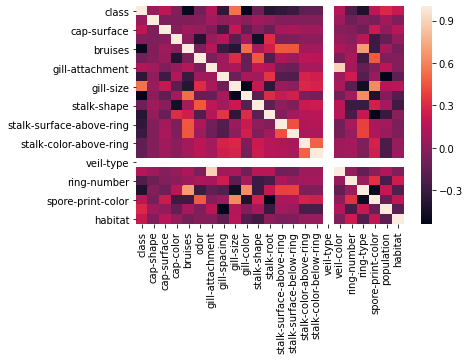

In [16]:
corr = data.corr()
sns.heatmap(corr)

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.59211948e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  4.35476041e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.93182410e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  7.01453987e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -3.98483680e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  7.43806407e-20]])

In [18]:
covariance = pca.get_covariance()

In [19]:
explained_variance = pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 7.90604723e-34])

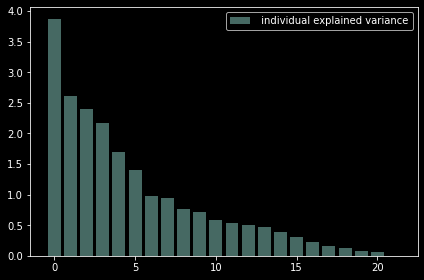

In [20]:
with plt.style.context('dark_background'):
    plt.figure(figsize = (6,4))
    plt.bar( range(22), explained_variance, alpha = 0.5, align = 'center' , label = ' individual explained variance' )
    plt.ylabel = ('Explained variance ratio')
    plt.xlabel = ('Principal components')
    plt.legend(loc = 'best')
    plt.tight_layout()

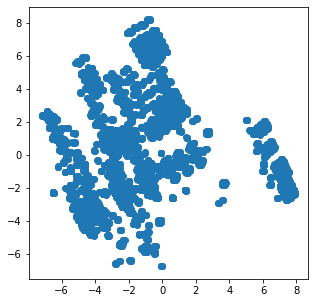

In [21]:
N = data.values 
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize=(5,5))
plt.scatter(x[:, 0], x[:, 1])
plt.show()


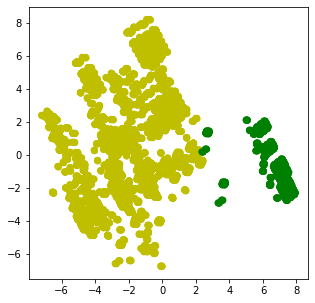

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 5)
X_clustered = kmeans.fit_predict(N)
LABEL_COLOR_MAP = {0 : 'g', 
                   1 : 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:, 0], x[:, 1], c = label_color)
plt.show()


In [23]:
pca_modified = PCA(n_components = 17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [25]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

model_LR = LogisticRegression(solver='lbfgs')

In [26]:
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_prob = model_LR.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_LR.score(X_test, y_pred)


1.0

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[815,  30],
       [ 36, 744]])

In [29]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)
auc_roc

0.9591715976331362

In [30]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob )
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9903474434835382

TypeError: 'str' object is not callable

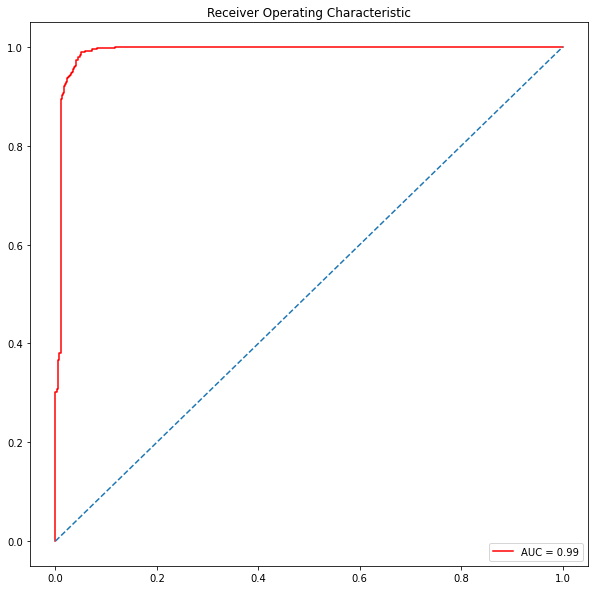

In [31]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color= 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0 ,1] , [0,1], linestyle= '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model = LogisticRegression()

tuned_parameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [33]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [34]:
from sklearn.model_selection import GridSearchCV
LR = GridSearchCV(LR_model, tuned_parameters, cv = 10)

LR.fit(X_train, y_train)

/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print(LR.best_params_)


{'C': 100, 'penalty': 'l2'}


In [36]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_pred)

1.0

In [37]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[824,  21],
       [ 23, 757]])

In [38]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97       845\n           1       0.97      0.97      0.97       780\n\n    accuracy                           0.97      1625\n   macro avg       0.97      0.97      0.97      1625\nweighted avg       0.97      0.97      0.97      1625\n'

In [39]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9728303747534518

In [40]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9916249431042331

TypeError: 'str' object is not callable

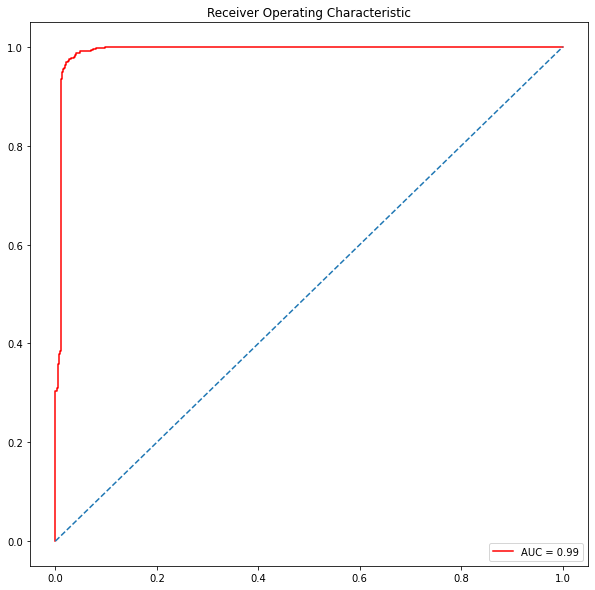

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [42]:
LR_ridge = LogisticRegression(penalty = 'l2')
LR_ridge.fit(X_train, y_train)

/Users/aakanksha/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_prob = LR_ridge.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)

1.0

In [44]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[814,  31],
       [ 37, 743]])

In [45]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc


'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96       845\n           1       0.96      0.95      0.96       780\n\n    accuracy                           0.96      1625\n   macro avg       0.96      0.96      0.96      1625\nweighted avg       0.96      0.96      0.96      1625\n'

In [46]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9579388560157791

In [47]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.99029889242907

TypeError: 'str' object is not callable

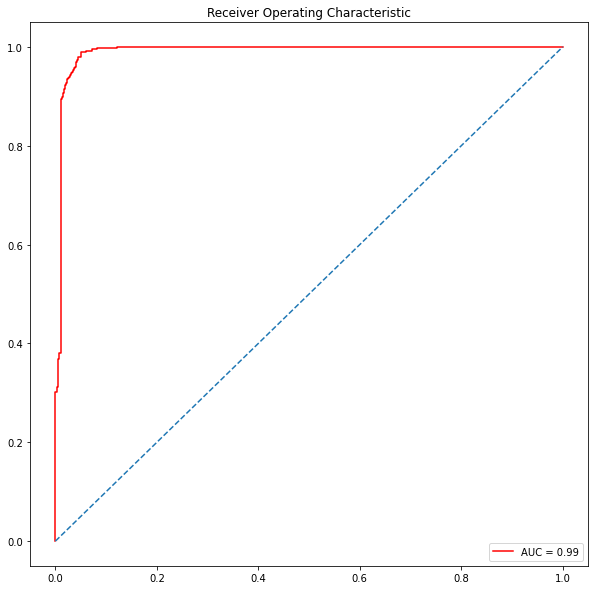

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [49]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
y_prob = model_naive.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>=0.5 , 1, 0)
model_naive.fit(X_test, y_pred)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)


1.0

In [53]:
print("Number of mislabeled points from %d points : %d" %(X_test.shape[0],(y_test!= y_pred).sum()))

Number of mislabeled points from 1625 points : 531


In [54]:
scores = cross_val_score(model_naive, X, y, cv =10, scoring = 'accuracy')
print(scores)

[0.59778598 0.78843788 0.97908979 0.9803198  0.84870849 0.81303813
 0.81034483 0.81650246 0.85326757 0.97533909]


In [55]:
scores.mean()

0.8462834022887495

In [56]:
confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[351, 494],
       [ 37, 743]])

In [57]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       0.90      0.42      0.57       845\n           1       0.60      0.95      0.74       780\n\n    accuracy                           0.67      1625\n   macro avg       0.75      0.68      0.65      1625\nweighted avg       0.76      0.67      0.65      1625\n'

In [58]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc


0.683974358974359

In [59]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.940588681535427

TypeError: 'str' object is not callable

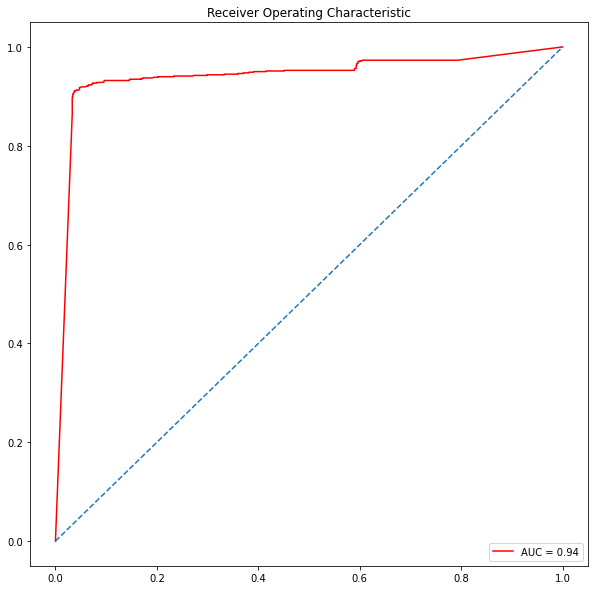

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [61]:
from sklearn.svm import SVC
svm_model = SVC()

In [62]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [65]:
from sklearn.model_selection import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [66]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [68]:
print(model_svm.cv_results_)


{'mean_fit_time': array([0.36194401, 3.0368819 , 0.23688252, 1.33163366, 0.11954653,
       0.5633743 , 0.4235399 , 0.34994392, 0.48842428, 0.245314  ,
       0.51266549, 0.30086129, 0.27096465, 2.87381876, 3.02899089,
       0.2247937 , 3.05488729, 0.39218934, 0.13579698, 0.11559982]), 'std_fit_time': array([0.06678847, 0.33693564, 0.01732887, 0.29103236, 0.01489359,
       0.02724221, 0.10469284, 0.07820495, 0.05715739, 0.00857146,
       0.01819726, 0.0808777 , 0.02346373, 0.23928494, 0.33706883,
       0.00636754, 0.3649608 , 0.02630751, 0.03290473, 0.01780809]), 'mean_score_time': array([0.0255132 , 0.09230633, 0.00736625, 0.0908556 , 0.00680182,
       0.04230609, 0.02483912, 0.01946065, 0.01960564, 0.01612682,
       0.038942  , 0.00619748, 0.02054925, 0.09257143, 0.08950384,
       0.01731431, 0.09189911, 0.01961884, 0.00599999, 0.00482531]), 'std_score_time': array([0.00743386, 0.01478818, 0.00063605, 0.01884297, 0.00083836,
       0.01038992, 0.00802322, 0.00384474, 0.0032669

In [69]:
print(model_svm.best_params_)


{'kernel': 'rbf', 'gamma': 1, 'C': 500}


In [70]:
y_pred = model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [71]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix


array([[845,   0],
       [  0, 780]])

In [72]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [73]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [74]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

TypeError: 'str' object is not callable

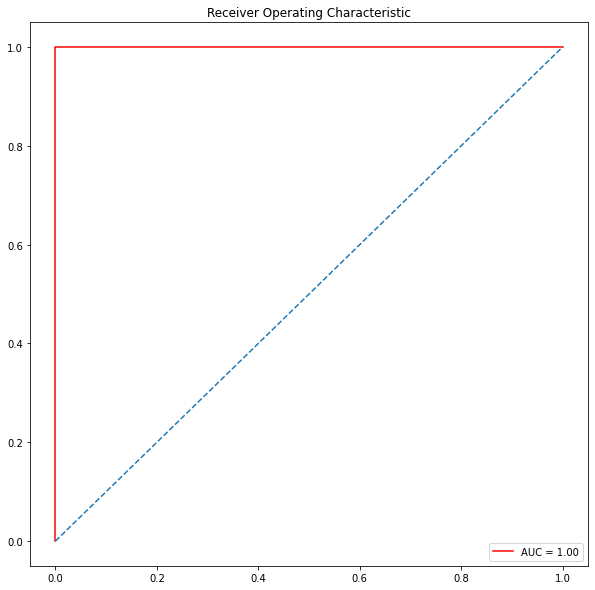

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [76]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [77]:
from sklearn.model_selection import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [78]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)


1.0


In [79]:
print(model_svm.cv_results_)


{'mean_fit_time': array([1.20202942, 1.21105335, 0.07917898, 0.11912947, 0.07178266,
       0.69123023, 0.13082707, 0.13838353, 0.09208107, 0.10600679,
       0.13534434, 1.45927668, 1.67704463, 0.08032844, 0.11540155,
       0.10297892, 0.08277054, 0.09081614, 0.10843248, 1.42588708]), 'std_fit_time': array([0.09571733, 0.18211874, 0.00389543, 0.0107607 , 0.00650989,
       0.06641894, 0.01065376, 0.04363098, 0.01151598, 0.03802036,
       0.01261351, 0.17381761, 0.12733963, 0.02343606, 0.01756501,
       0.00908443, 0.01447182, 0.01536862, 0.01049174, 0.11718779]), 'mean_score_time': array([0.070768  , 0.07389731, 0.00400853, 0.00623238, 0.00354035,
       0.04432683, 0.00853081, 0.00771518, 0.00445101, 0.00466421,
       0.00778272, 0.09157646, 0.1060004 , 0.00381458, 0.00639107,
       0.00610988, 0.00366998, 0.00454364, 0.00641499, 0.09028068]), 'std_score_time': array([0.00448143, 0.01193414, 0.00025227, 0.00036993, 0.00045553,
       0.00385751, 0.00029799, 0.00248432, 0.0003986

In [80]:
print(model_svm.best_params_)


{'kernel': 'poly', 'gamma': 0.1, 'degree': 3, 'C': 500}


In [81]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [82]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix


array([[845,   0],
       [  0, 780]])

In [83]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [84]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc


1.0

In [85]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


1.0

TypeError: 'str' object is not callable

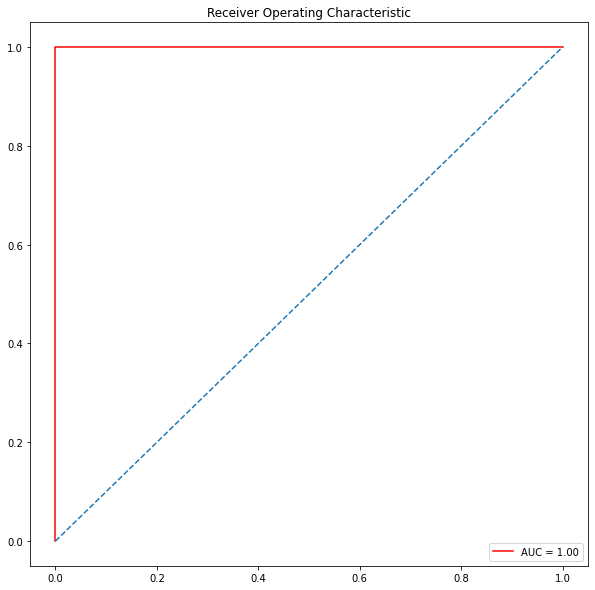

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')